In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df  = pd.read_csv('/content/Student_Registration_ALL_Formatted.csv')

In [ ]:
df['Roll No.'].unique().shape

(714,)

In [ ]:
student_course_matrix = df.pivot_table(index="Roll No.", columns="G CODE", aggfunc=lambda x: 1, fill_value=0)
student_course_matrix.columns = [col for col in student_course_matrix.columns]
student_matrix = student_course_matrix.to_numpy()


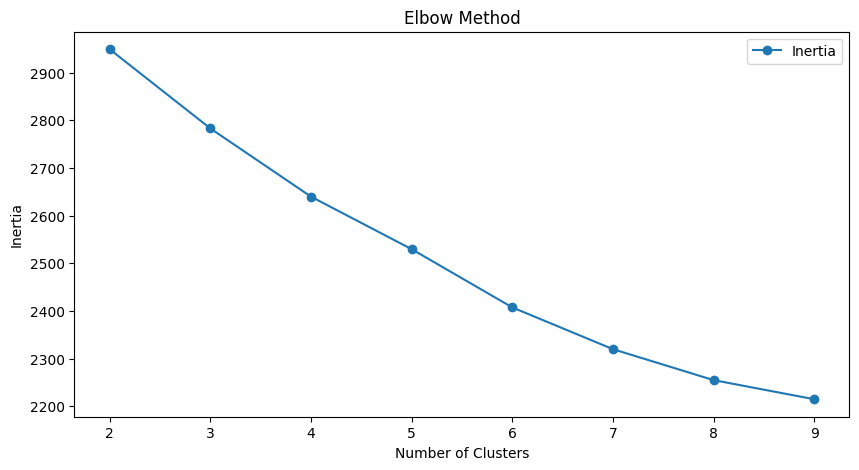

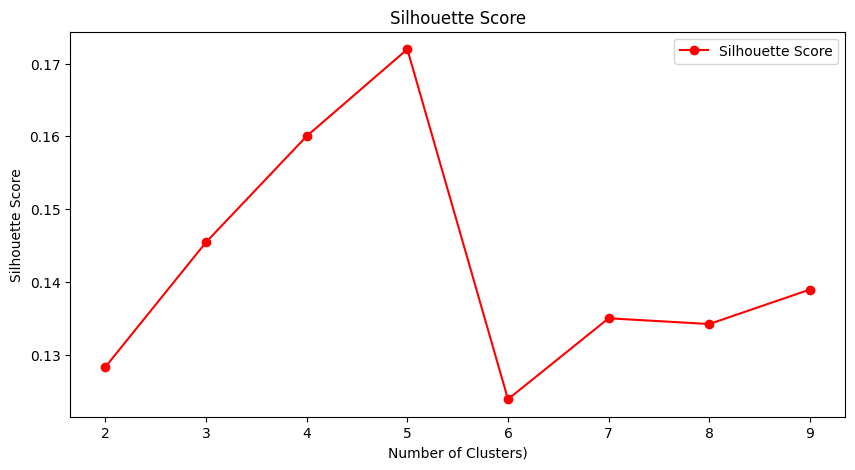

In [ ]:
  # Elbow Method and Silhouette Score
  inertia = []
  sil_scores = []
  K_range = range(2, min(10, len(student_course_matrix)))

  for k in K_range:
      kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
      labels = kmeans.fit_predict(student_matrix)
      inertia.append(kmeans.inertia_)
      sil_scores.append(silhouette_score(student_matrix, labels))

  # Plot Elbow Method
  plt.figure(figsize=(10, 5))
  plt.plot(K_range, inertia, marker='o', linestyle='-', label='Inertia')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.title('Elbow Method')
  plt.legend()
  plt.show()

  # Plot Silhouette Score
  plt.figure(figsize=(10, 5))
  plt.plot(K_range, sil_scores, marker='o', linestyle='-', color='red', label='Silhouette Score')
  plt.xlabel('Number of Clusters)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score')
  plt.legend()
  plt.show()

  optimal_k = K_range[np.argmax(sil_scores)]



In [ ]:
print(f"The optimal clusters are: {optimal_k}")

The optimal clusters are: 5


In [ ]:
# Running K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
student_clusters = kmeans.fit_predict(student_matrix)

student_course_matrix["Cluster"] = student_clusters
student_course_matrix.to_csv("Clustered.csv")

In [ ]:
student_course_matrix.head()

,ARTS205,ARTS337,ARTS340,BIOS219,BIOS221,BIOS226,BIOS227|ENVS227|PSYC227,BIOS228,BIOS232,BIOS390,...,SOCL201|POLT201,SOCL205|POLT235,SOCL225|POLT225|HIST225|LITT225,SOCL325|ENVS325,SOCL335,SOCL352|PSYC352,SOCL356,SOCL391,SOCL491,Cluster
Roll No.,,,,,,,,,,,,,,,,,,,,,
aadit_jain.sias23@krea.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aaditya_barthwal.sias23@krea.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aadya_gupta.sias23@krea.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aadya_mohta.sias24@krea.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
aahana_rath.sias24@krea.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [5]:
multi_section_courses = {
    "KCCS124-DAN": 5,
    "KCCS132-ETS": 3,
    "KCCS131-LAA": 4
}

section_assignments = []

for course, num_sections in multi_section_courses.items():
  # We fetch the dataset with the RollNo. and Clusters of the students enrolled in the {course}
  enrolled_students = student_course_matrix[student_course_matrix[course] == 1].reset_index()[["Roll No.", "Cluster"]]
  # GroupBy Aggregation based on Clusters. The Roll.No. are stored as lists.
  grouped_students = enrolled_students.groupby("Cluster")["Roll No."].apply(list)

  # Section Counter
  section_counter = 1

  # Distributes the weightage to all sections equally.
  # Potentially this could just be a cap of the section. The lower cap should probably not matter, or could be looked in later.
  max_section_size = max(10, len(enrolled_students) // num_sections)

  # Cluster and Student Roll. No.
  for cluster, students in grouped_students.items():
      cluster_size = len(students)

      # If the cluster size is less than or equal to the section cap, then assign all students in the cluster to the same section.
      if cluster_size <= max_section_size:
          for student in students:
              section_assignments.append({
                  "Roll No.": student,
                  "Course": course,
                  "Cluster": cluster,
                  "Assigned Section": f"{course}-Sec{section_counter}"
              })
          section_counter = (section_counter % num_sections) + 1

      # If the cluster is too large, split it evenly across sections.
      # If the cluster size is not perfectly divisible by the maximum section size (cluster_size % max_section_size != 0),
      # It means there are remaining students, and we need one more split to accommodate them.
      else:
          num_splits = min(num_sections, (cluster_size // max_section_size) + (1 if cluster_size % max_section_size != 0 else 0))
          students_per_section = cluster_size // num_splits
          for i in range(num_splits):
              assigned_students = students[i * students_per_section: (i + 1) * students_per_section]

              for student in assigned_students:
                  section_assignments.append({
                      "Roll No.": student,
                      "Course": course,
                      "Cluster": cluster,
                      "Assigned Section": f"{course}-Sec{section_counter}"
                  })

              section_counter = (section_counter % num_sections) + 1

# Convert the section assignments to a DataFrame
section_df = pd.DataFrame(section_assignments)


NameError: name 'student_course_matrix' is not defined

In [ ]:
enrolled_students = student_course_matrix[student_course_matrix["KCCS124-DAN"] == 1].reset_index()[["Roll No.", "Cluster"]]
enrolled_students.groupby("Cluster")["Roll No."].apply(list)


,Roll No.
Cluster,
0,[nithya_anandh.sias23@krea.ac.in]
1,"[govind_geethanand.sias23@krea.ac.in, mansi_mu..."
3,"[aadya_mohta.sias24@krea.ac.in, aarav_shetty.s..."
4,"[aanya_tripathi.sias23@krea.ac.in, adeeb_rahma..."


In [ ]:
section_df.to_csv("Assigned.csv")